In [2]:
import scipy.sparse as sp
import numpy as np
from load_data import Data
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt
import sys

In [43]:
dataset = 'steam'

In [36]:
user_prediction = np.load(dataset+'_user_prediction_group_similarity.npy')

In [37]:
user_prediction_item = np.load(dataset+'_user_prediction_item_similarity.npy')

In [14]:
a = np.array([[1,2],[3,4]])
a.sum(axis = 1)

array([3, 7])

In [38]:
user_prediction.shape

(19608, 46587)

In [39]:
user_prediction_item.shape

(19608, 46587)

In [44]:
a = np.array([[11,16,3,12],[16,11,3,12]])
np.argpartition(a,-2, axis=-1)[:,-2:]

array([[3, 1],
       [3, 0]])

In [40]:
ten_highest_group = np.argpartition(user_prediction, -10, axis = 1) [:,-10:]

In [40]:
ten_highest_group.shape

(19608, 10)

In [41]:
ten_highest_item = np.argpartition(user_prediction_item, -10, axis = 1) [:,-10:]

In [44]:
test_file = '../Data/'+dataset+'/test.txt'
test_ug_dict = {}
with open(test_file, 'r') as f:
    line = f.readline().strip()
    while line!= '':
        line = line.strip('\n').split(' ')
        uid = int(line[0])
        groups_test = [int(g) for g in line[1:]]
        test_ug_dict[uid] = groups_test
        line = f.readline().strip()

In [45]:
plt.rcParams['figure.figsize']=[7,4]

In [11]:
def draw_predicted(pred,test_ug_dict,k = 10):
    x = []
    y = []
    for u_idx in range(len(pred)):
        if u_idx in test_ug_dict:
            pred_groups = pred[u_idx].tolist()[0]
            intersect = list(set(test_ug_dict[u_idx]) & set(pred_groups))
            if intersect != []:
                x.extend([u_idx]*len(intersect))
                y.extend(intersect)
    plt.plot(x,y,'co',alpha = 0.5, markersize=1)
    plt.show()
    return 

In [46]:
def draw_predicted_diff(pred, pred_i ,test_ug_dict, color = 'c'):
    x = []
    y = []
    for u_idx in range(len(pred)):
        if u_idx in test_ug_dict:
            pred_groups = np.array(pred[u_idx]).flatten()
            pred_items = np.array(pred_i[u_idx]).flatten()
            diff = np.setdiff1d(pred_items, pred_groups)
            intersect = list(set(test_ug_dict[u_idx]) & set(diff))
            if intersect != []:
                x.extend([u_idx]*len(intersect))
                y.extend(intersect)
    plt.plot(x,y,'o',color = color, markersize=5)
    plt.show()
    return 

In [47]:
def draw_predicted_diff_both(pred, pred_i ,test_ug_dict, color = 'c', save_file = None):
    x = []
    y = []
    for u_idx in range(len(pred)):
        if u_idx in test_ug_dict:
            pred_groups = np.array(pred[u_idx]).flatten()
            pred_items = np.array(pred_i[u_idx]).flatten()
            diff = np.setdiff1d(pred_items, pred_groups)
            intersect = list(set(test_ug_dict[u_idx]) & set(diff))
            if intersect != []:
                x.extend([u_idx]*len(intersect))
                y.extend(intersect)
    plt.plot(x,y,'o',color = 'r', alpha = 0.7, markersize=5)
    t = pred
    pred = pred_i
    pred_i = t
    x = []
    y = []
    for u_idx in range(len(pred)):
        if u_idx in test_ug_dict:
            pred_groups = np.array(pred[u_idx]).flatten()
            pred_items = np.array(pred_i[u_idx]).flatten()
            diff = np.setdiff1d(pred_items, pred_groups)
            intersect = list(set(test_ug_dict[u_idx]) & set(diff))
            if intersect != []:
                x.extend([u_idx]*len(intersect))
                y.extend(intersect)
    plt.plot(x,y,'x',color = color, alpha = 0.7,markersize=5)
    if save_file:
        plt.savefig(save_file,format = 'pdf',bbox_inches='tight')
    plt.show()
    return 

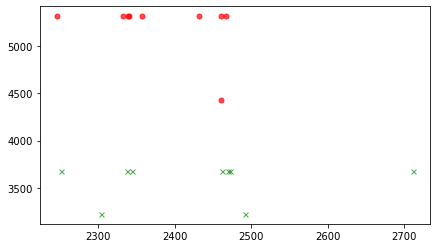

In [35]:
draw_predicted_diff_both(ten_highest_group, ten_highest_item ,test_ug_dict,'g',dataset)

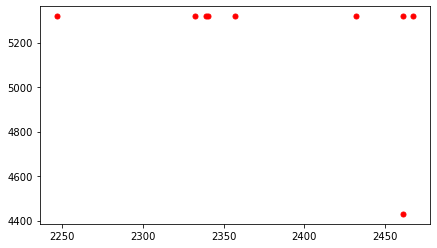

In [13]:
draw_predicted_diff(ten_highest_group, ten_highest_item ,test_ug_dict,'r')

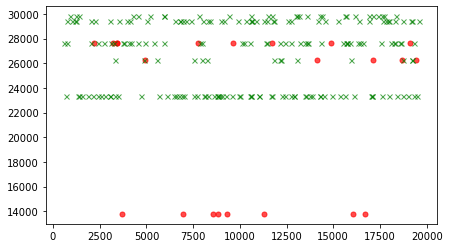

In [48]:
draw_predicted_diff_both(ten_highest_group, ten_highest_item ,test_ug_dict,'g',dataset)

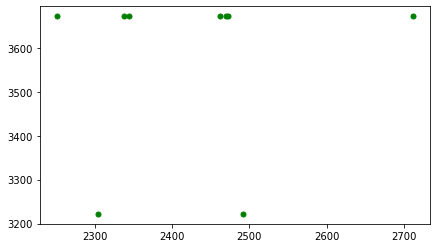

In [14]:
draw_predicted_diff(ten_highest_item, ten_highest_group ,test_ug_dict, 'g')

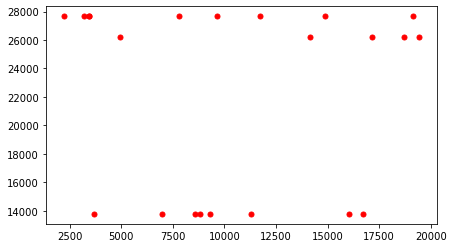

In [134]:
draw_predicted_diff(ten_highest_group, ten_highest_item ,test_ug_dict,'r')

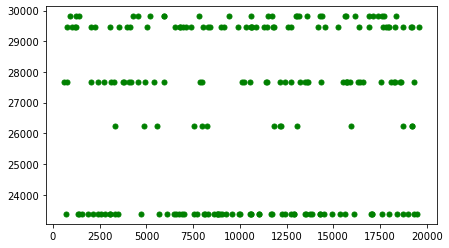

In [133]:
draw_predicted_diff(ten_highest_item, ten_highest_group ,test_ug_dict, 'g')

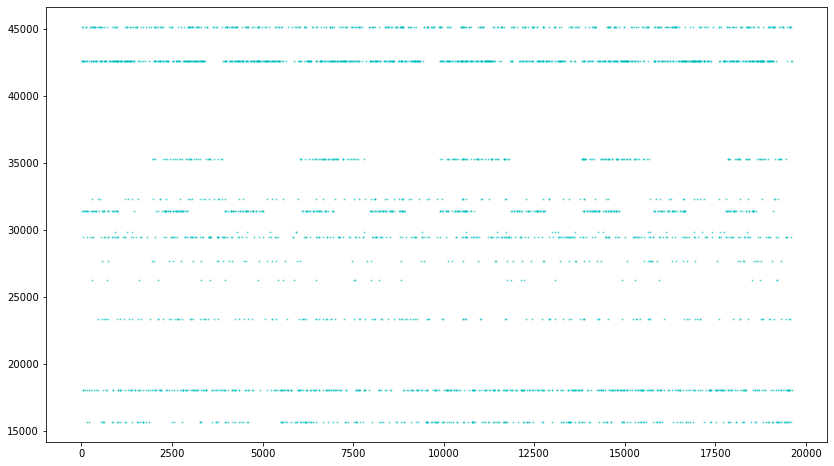

In [100]:
draw_predicted(ten_highest_group, test_ug_dict)

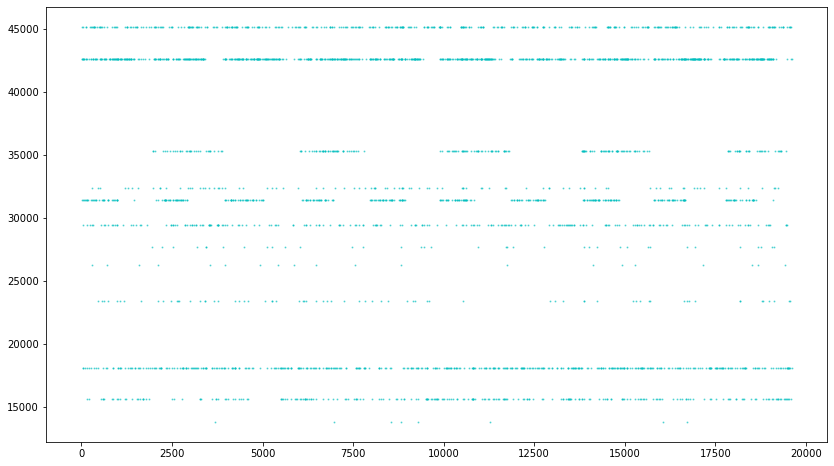

In [101]:
draw_predicted(ten_highest_item, test_ug_dict)